## Imports
 
We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization. 

In [109]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.25)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For changing categorical to numerical
from sklearn.preprocessing import LabelEncoder

# For performing statistical operations
import scipy.stats as stats

# For check for multi col-linearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For standardizing features by remvoing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# For bringing class balance in the dependent variable by over-sampling
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For checking accuracy score of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report

# Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. [Pandas has many methods](http://pandas.pydata.org/pandas-docs/stable/) to help make the data science/machine learning pipeline as smooth as possible.

In [110]:
# Read in data into a dataframe 
data=pd.read_csv("diabetic_data.csv")
# Display top of dataframe
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Taking a look at the raw data, we can already see a number of issues we'll have to solve. First of all, there are 50 columns and we don't know what many of them mean! All we know from the problem statement is that we want to predict the number in the score column. Some of the other column definitions can be reasonably guessed, but others are difficult to understand. In machine learning, this isn't actually a problem, because we let the model decide which features are important. Sometimes we may not even be given column names or told what we are predicting. Nonetheless, I like to understand the problem to the extent possible, and because we also want to interpret the model results, it would be a good idea to have some knowledge of the columns.

While we don't need to study every column, it would be a good idea to at least understand the target we want to predict. Here is the definition for the readmitted target:
In this database, we have **3 different outputs**:

  **No re-admission**;

  **A re-admission in less than 30 days** ;

  **A re-admission in more than 30 days**;

In [111]:
data["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

## Data Types and Missing Values

The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as "?" rather than as np.nan (not a number). This means the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [112]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

Sure enough, there are a number of columns with numbers that have been recorded as object datatypes. These will have to be converted to float datatype before we can do any numerical analysis.

## Missing Values

In [113]:
# Replace all occurrences of ? with numpy not a number
data.replace('?',np.nan,inplace=True)

We can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.     
     
Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. As with many tasks in data science, I did not write this function myself, but rather found it online in a Stack Overflow forum!     

In [114]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [115]:
missing_values_table(data)

Your selected dataframe has 50 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
weight,98569,96.9
medical_specialty,49949,49.1
payer_code,40256,39.6
race,2273,2.2
diag_3,1423,1.4
diag_2,358,0.4
diag_1,21,0.0


Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.

What columns to retain may be a little arbitrary, but for this project, we will remove any columns with more than 30% missing values.

In [116]:
# Get the columns with > 30% missing
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 30].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 50 columns.
There are 7 columns that have missing values.
We will remove 3 columns.


In [117]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

We are dropping all rows containing null values as the number of nulls present are approximately 4% of the entire dataset.

In [118]:
# dropping rows with NaNs.
data.dropna(inplace=True)

# Rearrange the index
data.index = range(len(data))

# Convert Data to Correct Types and Feature Engineering

We convert the columns with numbers into numeric data types by replacing the strings which can be interpreted as floats. Then we will convert the columns that contain numeric values into numeric datatypes.     
     
Feature Engineering: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.

In this project, we will take the following steps for feature engineering:     
     
1. Convert object type variables to numerical.     
2. Label encode the categorical variables for achieving point 1.
3. Group similar data.     
     
Note:     
We will label encode the variables 'race', 'diag_1', 'diag_2' and 'diag_3' after our EDA.     

**Values of diagnosis:**     
     
International Classification of Diseases (ICD-9) - The International Classification of Diseases (ICD) is designed to promote international comparability in the collection, processing, classification, and presentation of mortality statistics.     
     
For codes and related diseases, please refer to the following link -    

https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp/physicians/diagnostic-code-descriptions-icd-9

For diag_1, diag_2 and diag_3 columns, we will replace all values containing E or V with - for transformation to a numerical type. We will also change all 250.xx values to 250.

In [119]:
# Replacement and transformation for diagnosis variables.

diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    data[col] = data[col].str.replace('E','-')
    data[col] = data[col].str.replace('V','-')
    condition = data[col].str.contains('250')
    data.loc[condition,col] = '250'
    
data[diag_cols] = data[diag_cols].astype(float)

We will group the various codes of diagnosis according to ICD-9 standard.

In [120]:
# Function to group diag_1, diag_2 and diag_3

def grouping(value):
    if value==250:
        return 'Diabetes'
    elif (value>=390 and value<=459) or (value==785):
        return 'Circulatory'
    elif (value>=460 and value<=519) or (value==786):
        return 'Respiratory'
    elif (value>=520 and value<=579) or (value==787):
        return 'Digestive'
    elif (value>=800 and value<=999):
        return 'Injury'
    elif (value>=710 and value<=739):
        return 'Musculoskeletal'
    elif (value>=580 and value<=629) or value==788:
        return 'Genitourinary'
    elif (value>=1 and value<=239) or (value in [780,781,782,784]) or (value>=790 and value<=799) or ((value>=240 and value<=279) and 
                                                                                           value!=250) or (value>=680 and 
                                                                                                          value<=709):
        return 'Neoplasms'
    else:
        return "Other"

In [121]:
# Grouping
for col in diag_cols:
    data[col] = data[col].apply(grouping)

**Values of age:**   
     
The values of the age column are given as ranges and is of type string. We will covert them into 3 Categories and create a new feature 'age_cat' .

In [122]:
# Transformation for age column

spiltted_age = data['age'].str[1:-1].str.split('-')

for i in range(len(spiltted_age)):
    value_1 = (int)(spiltted_age[i][0])
    value_2 = (int)(spiltted_age[i][1])
    data['age'][i] = (value_1+value_2)/2

data['age'] = data['age'].astype(int)
def age_category(age):
    if age>=5 and age<=35:
        return 0
    elif age>35 and age<=60:
        return 1
    else:
        return 2

data['age_cat'] = data['age'].apply(age_category).astype('category')

data.drop('age',axis=1,inplace=True)

**Values of max_glu_serum:**    
     
Blood sugar level - The blood sugar level, blood sugar concentration, or blood glucose level is the concentration of glucose present in the blood of humans and other animals. Glucose is a simple sugar and approximately 4 grams of glucose are present in the blood of a 70-kilogram (150 lb) human at all times.[2] The body tightly regulates blood glucose levels as a part of metabolic homeostasis.[2] Glucose is stored in skeletal muscle and liver cells in the form of glycogen;[2] in fasted individuals, blood glucose is maintained at a constant level at the expense of glycogen stores in the liver and skeletal muscle.

For various levels, please refer to the below link -

https://www.sciencedirect.com/topics/immunology-and-microbiology/glucose-level

In [123]:
data["max_glu_serum"].value_counts()

None    92845
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [124]:
data['max_glu_serum'] = data['max_glu_serum'].replace({'>200':"high",'>300':"veryhigh"})
data["max_glu_serum"].value_counts()

None        92845
Norm         2532
high         1449
veryhigh     1227
Name: max_glu_serum, dtype: int64

**Values of Medications**: 

For the generic names: ***metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone***, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

In [125]:
# Transforamtion for medications

data.iloc[:,20:43] = data.iloc[:,20:43].replace({'Up':3, 'Down':1, 'Steady':2, 'No':0}).astype('category')

In [126]:
data=data[(data['gender'] == "Male")| (data['gender'] =="Female")]
#data['gender'] = data['gender'].replace({'Male':0,'Female':1})

In [127]:
#Transformation of re-admitted (target Variable)
data['readmitted'] = data['readmitted'].replace({'NO':0,'>30':1,"<30":1}).astype('category')

In the readmission transforamtion we transformed our data fo no as 0 and yes for 1

In [128]:
data["race"].value_counts()

Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

In [129]:
# Transforamtion of  race to three different races

data['race'] = data['race'].replace({'Hispanic':"Other",'Asian':"Other"})
data["race"].value_counts()

Caucasian          75079
AfricanAmerican    18881
Other               4092
Name: race, dtype: int64

In [130]:
col=["number_emergency","number_inpatient","number_outpatient","num_medications","num_procedures","num_lab_procedures"]
for i in col:
    x=data[i].value_counts()
    print(i)
    print(len(x))
    print(x)

number_emergency
33
0     86845
1      7550
2      2011
3       716
4       372
5       190
6        93
7        72
8        50
10       34
9        32
11       22
13       12
12       10
22        6
18        5
16        5
20        4
19        4
15        3
14        2
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64
number_inpatient
20
0     64633
1     19067
2      7421
3      3346
4      1597
5       802
6       474
7       266
8       147
9       111
10       60
11       48
12       33
13       20
14       10
15        8
16        5
19        2
18        1
21        1
Name: number_inpatient, dtype: int64
number_outpatient
39
0     81679
1      8340
2      3514
3      2005
4      1078
5       521
6       297
7       153
8        98
9        83
10       57
11       41
13       31
12       30
14       28
15       20
16       15
17        8
21        7
2

['number_emergency', 'number_inpatient', 'number_outpatient', 'num_medications', 'num_procedures', 'num_lab_procedures']


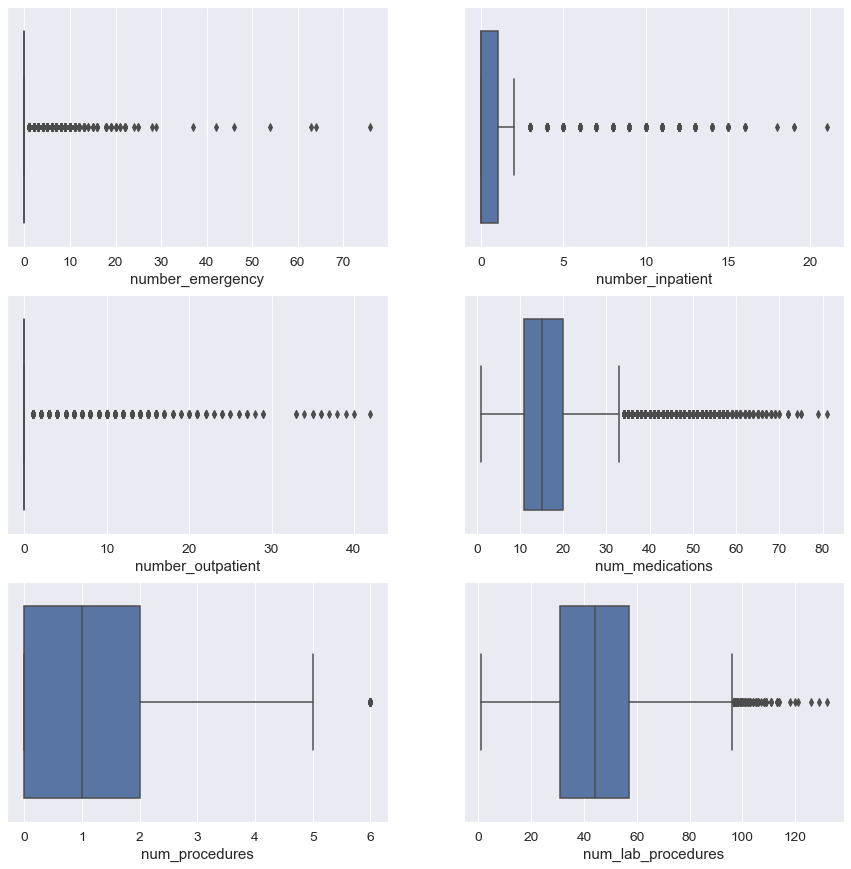

In [131]:
num_of_rows = 3
num_of_cols = 2
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(col)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(data[col[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('before_removing_outliers_from_numerical_columns.png')
plt.show()

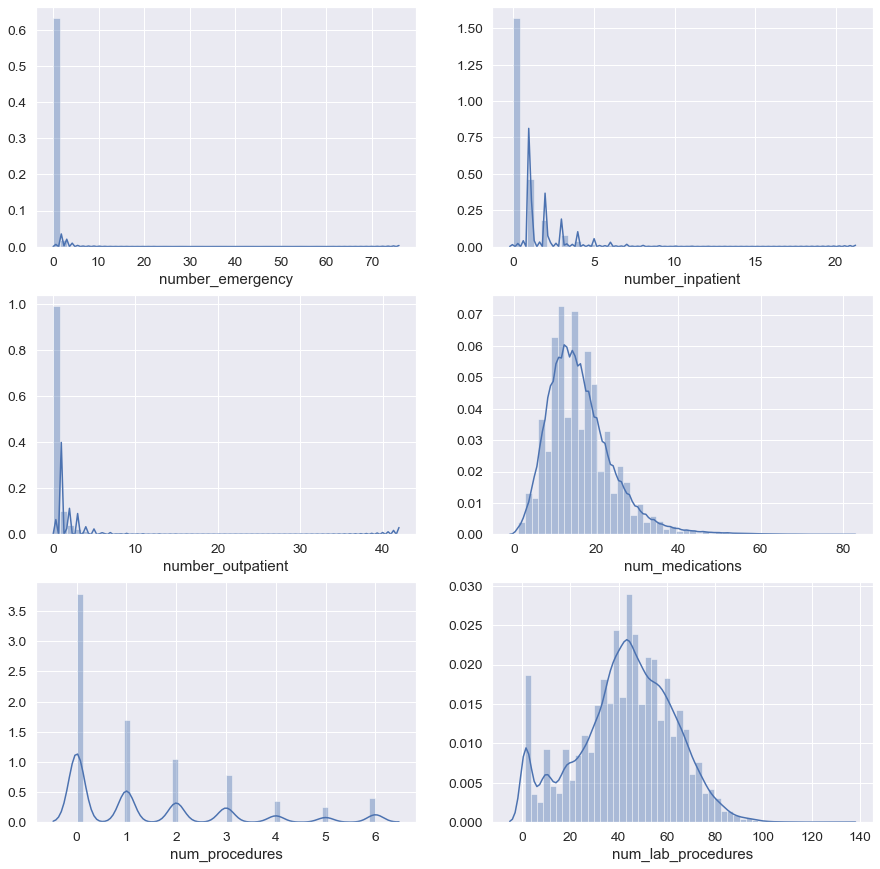

In [132]:
num_of_rows = 3
num_of_cols = 2
def plotHist():
    fig, ax =plt.subplots(num_of_rows,num_of_cols, figsize=(15,15))
    i=0;j=0;k=0
    while i<num_of_rows:
        while j<num_of_cols:
            sns.distplot(data[col[k]], ax=ax[i, j])
            k+=1;j+=1
        j=0;i+=1 
    plt.savefig('distribution_before_removing_missing_values_from_numerical_columns.png')
    plt.show()
plotHist()

In [133]:
col=["number_emergency","number_inpatient","number_outpatient","num_procedures","num_lab_procedures","num_medications"]
for i in col:
    data[i]=np.sqrt(data[i])  

In [134]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = data[numerical[i]].quantile(0.25)
        q3 = data[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        data.loc[(data[numerical[i]] <= minimum), numerical[i]] = minimum
        data.loc[(data[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(col)

['number_emergency', 'number_inpatient', 'number_outpatient', 'num_procedures', 'num_lab_procedures', 'num_medications']


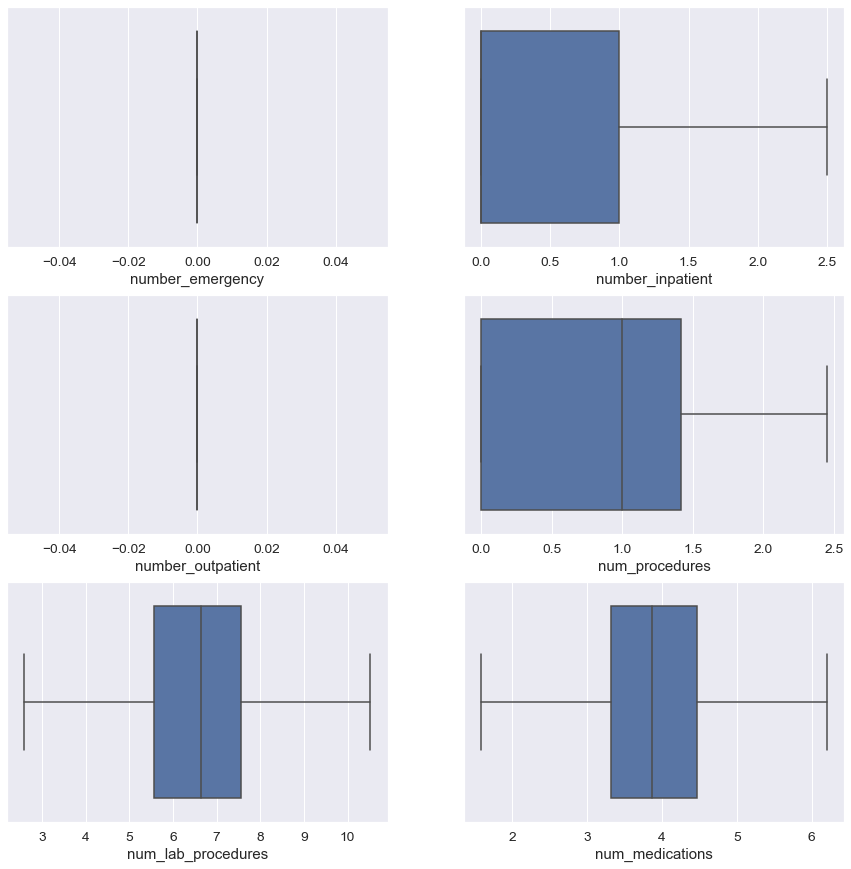

In [135]:
num_of_rows = 3
num_of_cols = 2
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(col)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(data[col[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('after_removing_outliers_from_numerical_columns.png')
plt.show()

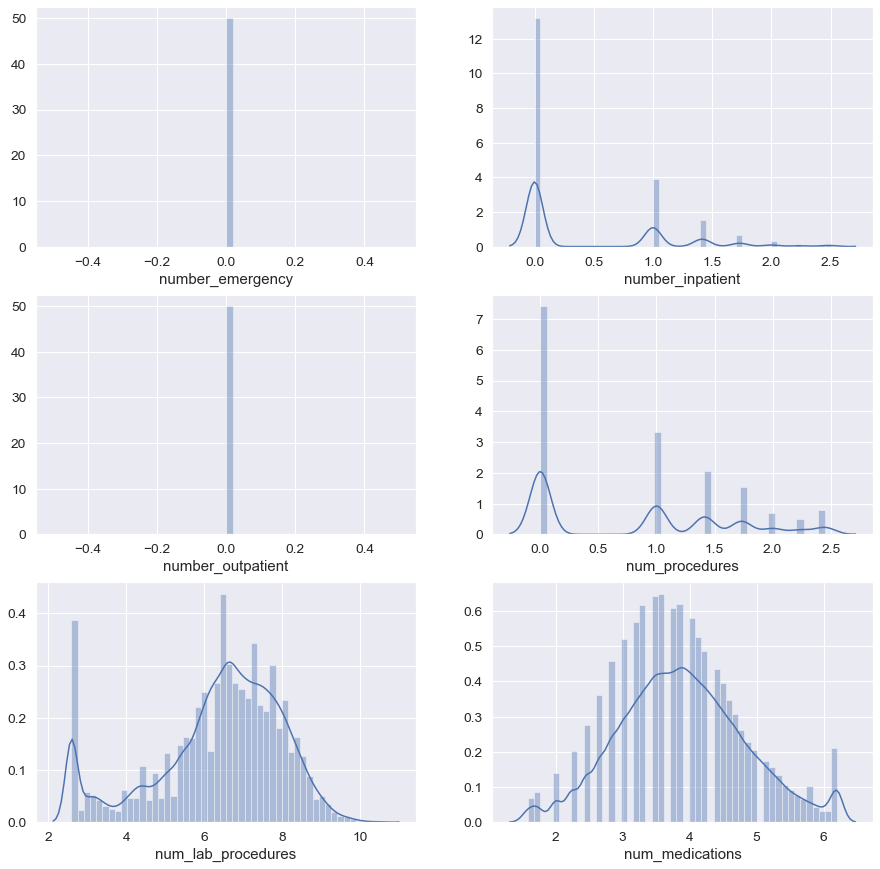

In [136]:
num_of_rows = 3
num_of_cols = 2
def plotHist():
    fig, ax =plt.subplots(num_of_rows,num_of_cols, figsize=(15,15))
    i=0;j=0;k=0
    while i<num_of_rows:
        while j<num_of_cols:
            sns.distplot(data[col[k]], ax=ax[i, j])
            k+=1;j+=1
        j=0;i+=1 
    plt.savefig('distribution_after_removing_missing_values_from_numerical_columns.png')
    plt.show()
plotHist()

### **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.


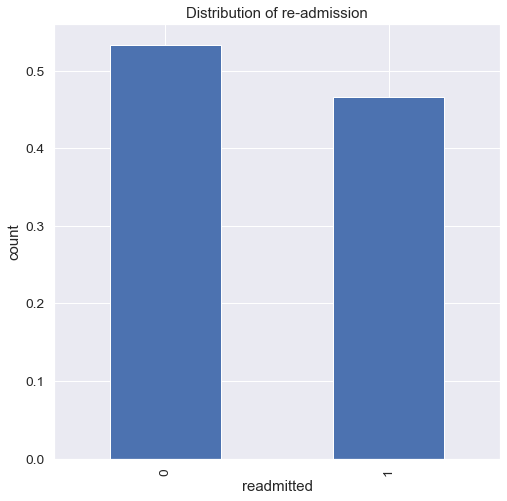

In [137]:
plt.figure(figsize=(8,8))
data['readmitted'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of re-admission")
plt.xlabel("readmitted")
plt.ylabel("count")
plt.show()

##### **Inferences:**



1.   The number of patients appearing for readmission in the hospitals is slightly less than the ones not appearing for the same.


2.   The target variable is fairly balanced.



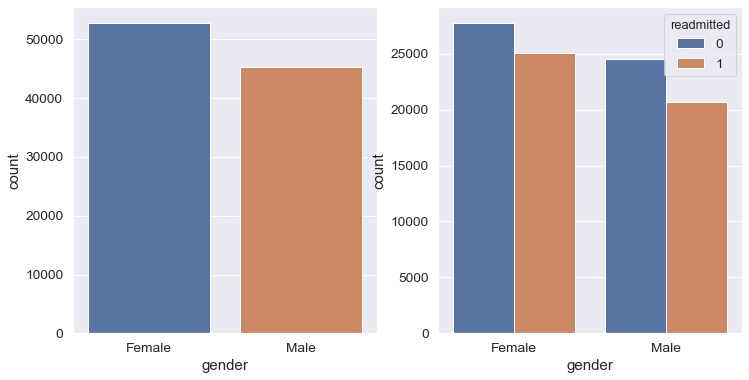

In [138]:
# Count plot of Gender by readmission status

f, axes = plt.subplots(1, 2, figsize=(12,6))
axes = axes.flatten()
sns.countplot(data['gender'], ax=axes[0])
sns.countplot(data['gender'],hue = data['readmitted'], ax=axes[1])
plt.show()

**Inferences:**



1.   The number of females are more than the number of males.

2.   Percentage of males getting readmitted is approximately 45% of total males.

3.   Percentage of females getting readmitted is approximately 47% of total females.
4.   Percentage of females getting readmitted are more than that of males.






In [139]:
pd.crosstab(data.readmitted,data.gender,normalize="columns")

gender,Female,Male
readmitted,,
0,0.525637,0.543267
1,0.474363,0.456733


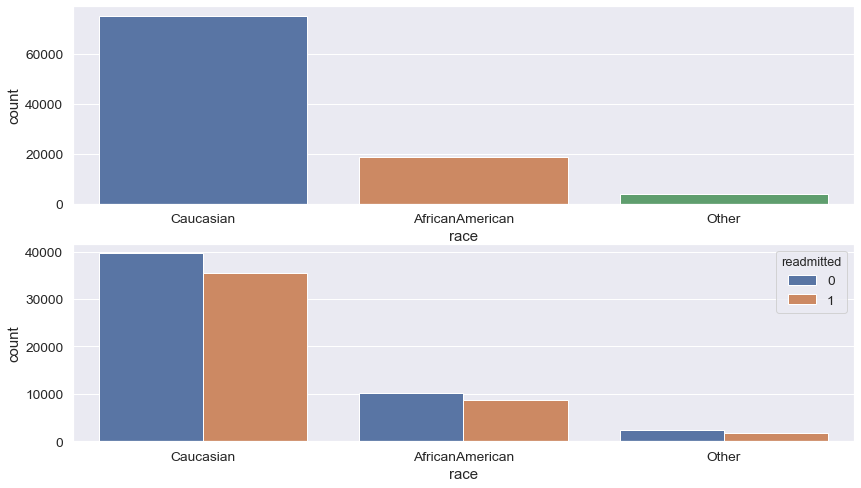

In [140]:
# Count plot of Gender by readmission status

f, axes = plt.subplots(2, 1, figsize=(14,8))
axes = axes.flatten()
sns.countplot(data['race'], ax=axes[0])
sns.countplot(data['race'],hue = data['readmitted'], ax=axes[1])

plt.show()



**Inferences:**

1.   The total number of Caucasians are signiicantly more than all other race.
2.   The percentage of readmissions as well as non-readmissions are more for Caucasians than any other race.
3.   The race of Asians are least in number.
4.   Approximately 90% of the Caucasians gets readmitted whereas 83% of the AfricanAmerican gets readmitting.


4.422010769795619


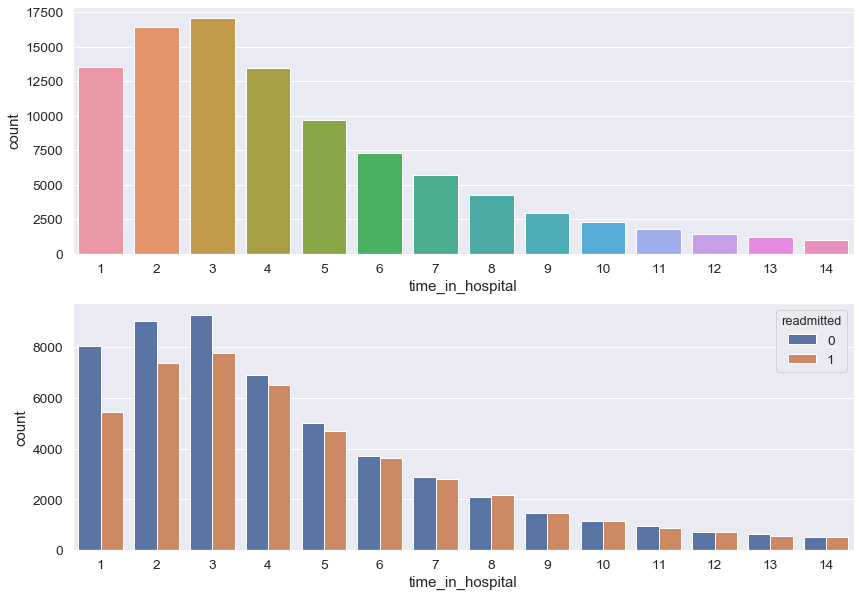

In [141]:
f, axes = plt.subplots(2, 1, figsize=(14,10))
axes = axes.flatten()
sns.countplot(data['time_in_hospital'],ax=axes[0])
sns.countplot(data['time_in_hospital'],hue = data['readmitted'], ax=axes[1])
print(data["time_in_hospital"].mean())
plt.show()

Inferences:
1.  The average number of days of admission is around 4 days.
2.  It is most likely that people readmiting those who were admitted for more than 7days in there first admission.
3.  Percentage of patients readmitting  who have been admitted for 1day is very less compare to other patients.

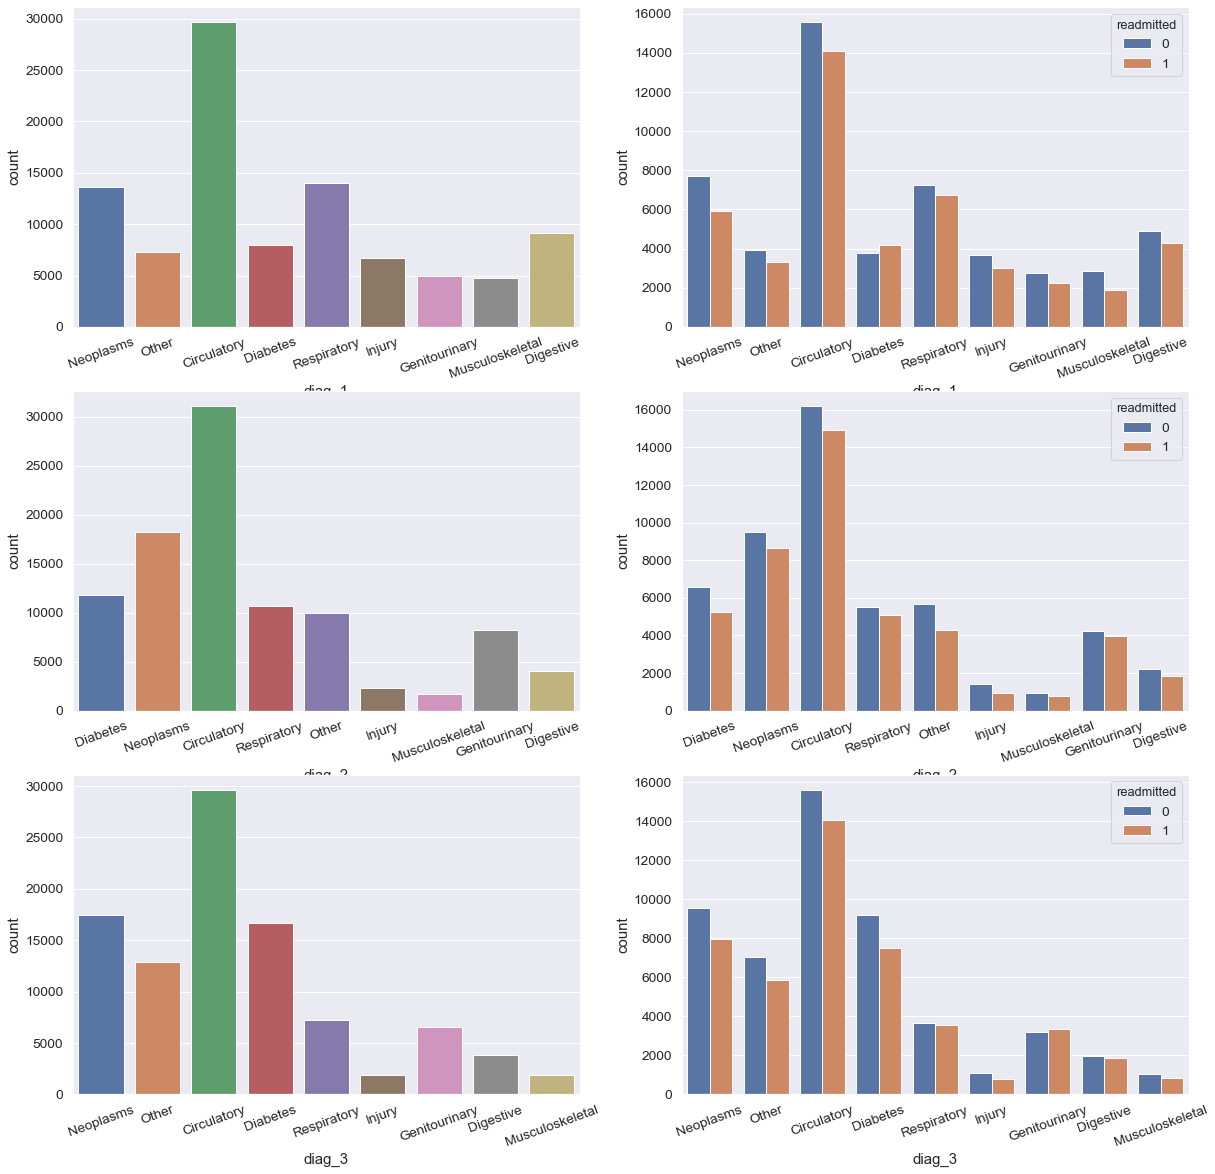

In [142]:
# Count plot of Primary diagnosis by readmission status

fig,ax = plt.subplots(3,2,figsize=(20,20))
ax = ax.flatten()

a=sns.countplot(data['diag_1'], ax=ax[0])
a.tick_params(axis="x",labelrotation=20)
b=sns.countplot(data['diag_1'],hue=data['readmitted'], ax=ax[1])
b.tick_params(axis="x",labelrotation=20)

c=sns.countplot(data['diag_2'], ax=ax[2])
c.tick_params(axis="x",labelrotation=20)
d=sns.countplot(data['diag_2'],hue=data['readmitted'], ax=ax[3])
d.tick_params(axis="x",labelrotation=20)
e=sns.countplot(data['diag_3'], ax=ax[4])
e.tick_params(axis="x",labelrotation=20)
f=sns.countplot(data['diag_3'],hue=data['readmitted'], ax=ax[5])
f.set_xticklabels(f.get_xticklabels(), rotation=20)
plt.show()

**Inferences:**



1.   The total number of patients under the primary diagnosis category of 'Circulatory' is maximum.

2.   The total number of patients under the primary diagnosis categories of 'Neoplasms' and 'Respiratory' are almost equal.
3.   The total number of readmissions under 'Diabetes' are more than the number of non-readmissions.
4.   Musculoskeletal has the least number of readmissions.



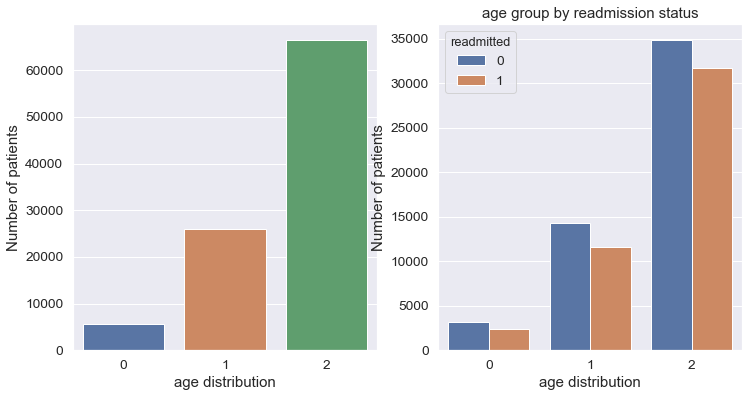

In [143]:
f, axes = plt.subplots(1, 2, figsize=(12,6))
axes = axes.flatten()
sns.countplot(data['age_cat'], ax=axes[0])
axes[0].set_xlabel('age distribution')
axes[0].set_ylabel('Number of patients')
sns.countplot(data['age_cat'],hue = data['readmitted'], ax=axes[1]).set_title('age group by readmission status')
axes[1].set_xlabel('age distribution')
axes[1].set_ylabel('Number of patients')
plt.show()

**Inferences:**
1.   Patients with age more than 60 years are more in number.
2.   Around 69% of the pateints above 60 years are readmitting.

In [144]:
admission_source = data['admission_source_id'].replace({1:'Admitted because of physician/clinic referral',2:'Admitted because of physician/clinic referral',
                                                       3:'Admitted because of physician/clinic referral',4:'Otherwise',
                                                       5:'Otherwise',
                                                       6:'Otherwise',
                                                       7:'Admitted from emergency room',8:'Otherwise',
                                                       9:'Otherwise',10:'Otherwise',
                                                       11:'Otherwise',13:'Otherwise',14:'Otherwise',
                                                       17:'Otherwise',20:'Otherwise',22:'Otherwise',
                                                       25:'Otherwise'})

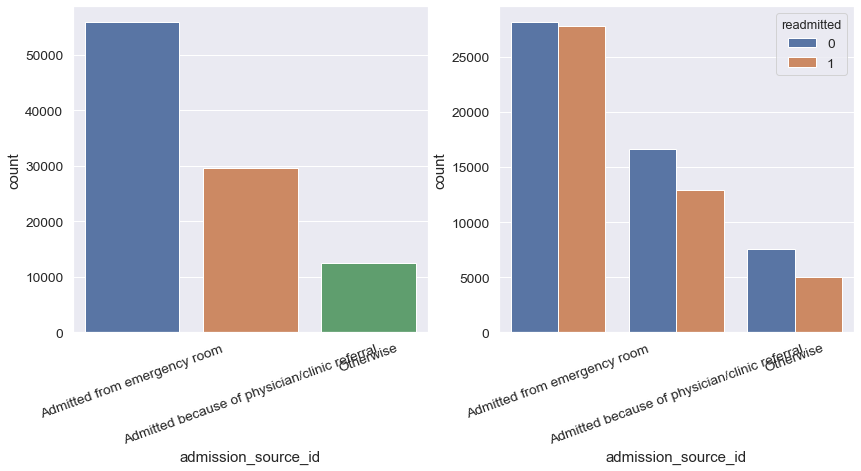

In [145]:
 fig,ax = plt.subplots(1,2,figsize=(14,6)) 
 ax = ax.flatten() 
 a=sns.countplot(x=admission_source,ax = ax[0]) 
 a.set_xticklabels(a.get_xticklabels(), rotation=20)
 b=sns.countplot(x=admission_source,hue = data['readmitted'],ax = ax[1])
 b.set_xticklabels(b.get_xticklabels(), rotation=20)
 plt.show()

**Inferences:**

1.   Pateints Admitted from emergency room are more in number than those admitted from any other admission source.
2.   over 98.6% of the pateints readmitted are those who admitted from emergency room.


In [146]:
print(pd.crosstab(data.readmitted,data.A1Cresult))
pd.crosstab(data.readmitted,data.A1Cresult,normalize="columns")

A1Cresult     >7    >8   None  Norm
readmitted                         
0           2058  4060  43405  2814
1           1650  3571  38454  2040


A1Cresult,>7,>8,None,Norm
readmitted,,,,
0,0.555016,0.53204,0.530241,0.579728
1,0.444984,0.46796,0.469759,0.420272


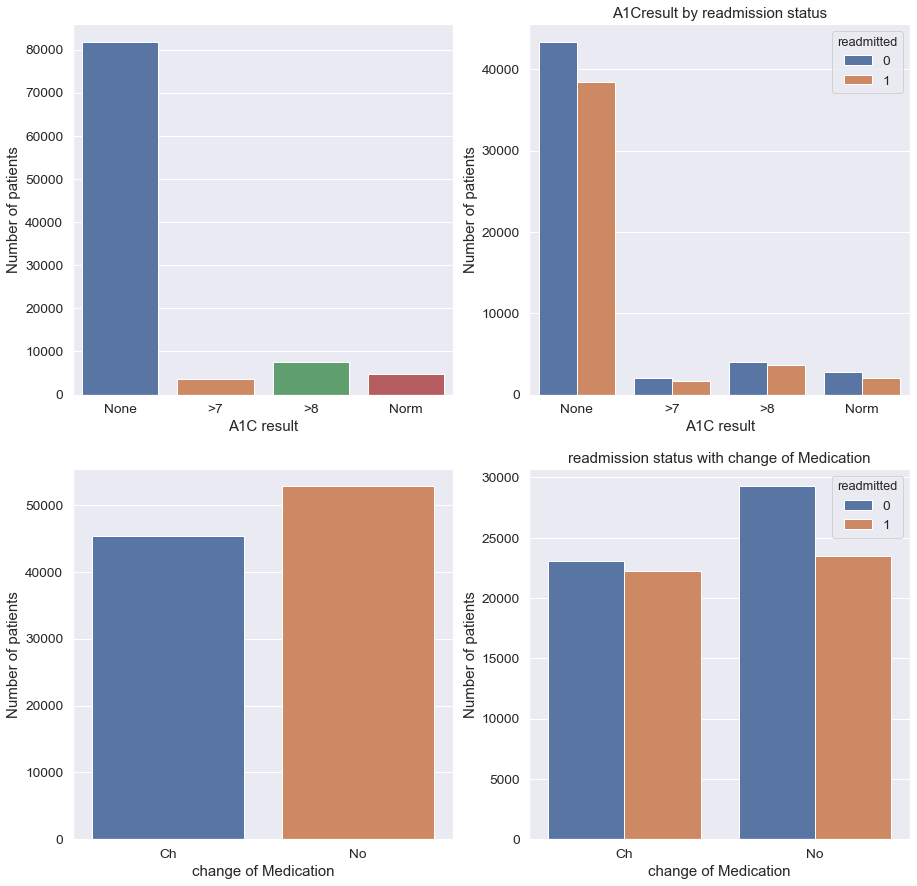

In [147]:
# Count plot for A1Cresult and medication changes

figsize(20,10)
f, axes = plt.subplots(2, 2, figsize=(15,15))
axes = axes.flatten()
sns.countplot(data['A1Cresult'], ax=axes[0])
axes[0].set_xlabel('A1C result')
axes[0].set_ylabel('Number of patients')
sns.countplot(data['A1Cresult'],hue = data['readmitted'], ax=axes[1]).set_title('A1Cresult by readmission status')
axes[1].set_xlabel('A1C result')
axes[1].set_ylabel('Number of patients')
sns.countplot(data['change'], ax=axes[2])
axes[2].set_xlabel('change of Medication')
axes[2].set_ylabel('Number of patients')
sns.countplot(data['change'],hue = data['readmitted'], ax=axes[3]).set_title('readmission status with change of Medication')
axes[3].set_xlabel('change of Medication')
axes[3].set_ylabel('Number of patients')
plt.show()

**Inferences:**
* Number of patients those who did not take A1C test are higher.
* Approximately 88.5% of patients those who did not take A1C test and 80% of patients who took A1C test readmitted.
* 42.02% of patients readmitted whose A1C test result was Normal.

diabetesMed     No    Yes
readmitted               
0            13402  38935
1             9300  36415


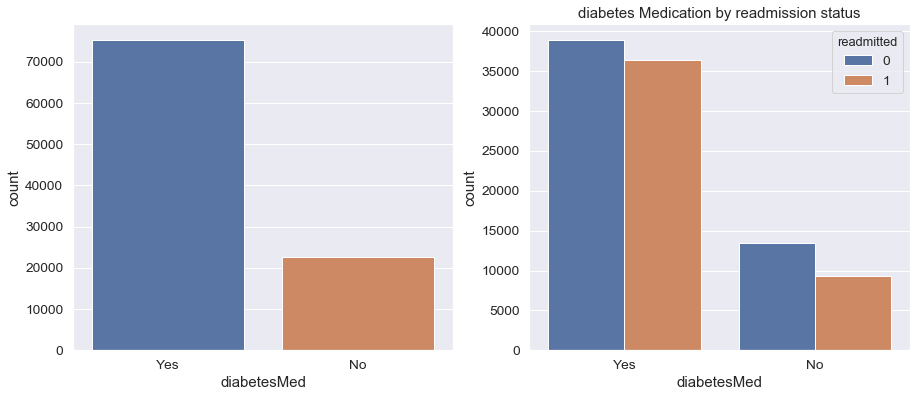

In [148]:
print(pd.crosstab(data.readmitted,data.diabetesMed))
f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data['diabetesMed'], ax=axes[0])
axes[0].set_xlabel('diabetesMed')

sns.countplot(data['diabetesMed'],hue = data['readmitted'], ax=axes[1]).set_title('diabetes Medication by readmission status')
axes[1].set_xlabel('diabetesMed')

plt.show()

**Inferences**:
*  From the total data around 76% are took medications and in that 95% are readmitted.
*  Those who are didn't took medications around 67% are readmitted

max_glu_serum   None  Norm  high  veryhigh
readmitted                                
0              49676  1376   746       539
1              43168  1156   703       688


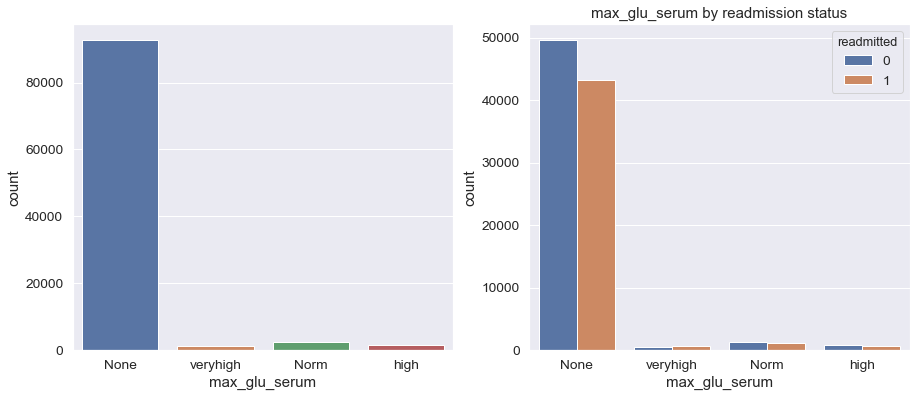

In [149]:
print(pd.crosstab(data.readmitted,data.max_glu_serum))
f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data['max_glu_serum'], ax=axes[0])
axes[0].set_xlabel('max_glu_serum')

sns.countplot(data['max_glu_serum'],hue = data['readmitted'], ax=axes[1]).set_title('max_glu_serum by readmission status')
axes[1].set_xlabel('max_glu_serum')

plt.show()

**Inferences:**
*   Approx.,**95%** of patients are not taking max_glu_serum test
*   Approx.,**46%** of patients who didnt take test readmitted
*   Approx.,**56%** of the patients whose max_glu_serum values greater than 300 are readmitting

0    0.468547
2    0.299515
1    0.120783
3    0.111155
Name: insulin, dtype: float64


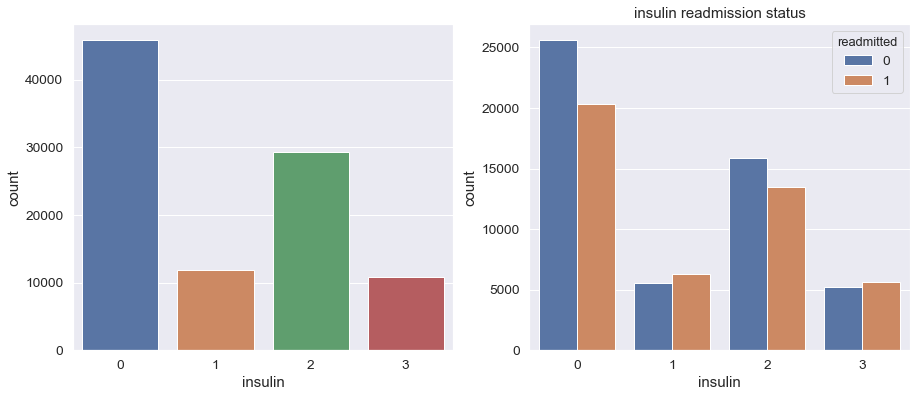

In [150]:
print(data.insulin.value_counts(normalize=True))
f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data['insulin'], ax=axes[0])
axes[0].set_xlabel('insulin')

sns.countplot(data['insulin'],hue = data['readmitted'], ax=axes[1]).set_title('insulin readmission status')
axes[1].set_xlabel('insulin')

plt.show()

**Inferences:**
*    insulin was not prescribed for 46%  of the patiensts.
*    there is no change in insulin dosage for Aprox..30%.
*    readmission rate is more for the patients whose insulin dosage is either increase or decrease.


**Note:**
*    except insulin all other medications dosage was steady.

In [151]:
data.discharge_disposition_id.value_counts()

1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
11     1606
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [152]:
data["discharge_disposition"] = data['discharge_disposition_id'].replace({1:'discharged to home',2:'Otherwise',
                                                       3:'Otherwise',4:'Otherwise',
                                                       5:'Otherwise',
                                                       6:'discharged to home',
                                                       7:'Otherwise',8:'discharged to home',
                                                       9:'Otherwise',10:'Otherwise',
                                                       11:'Otherwise',12:'Otherwise',13:'Otherwise',14:'Otherwise',15:'Otherwise',16:'Otherwise',
                                                       17:'Otherwise',18:'Otherwise',19:'Otherwise',20:'Otherwise',22:'Otherwise',23:'Otherwise',24:'Otherwise',
                                                       25:'Otherwise',27:'Otherwise',28:'Otherwise',29:'Otherwise'})
data["admission_source"] = data['admission_source_id'].replace({1:'Admitted because of physician/clinic referral',2:'Admitted because of physician/clinic referral',
                                                       3:'Admitted because of physician/clinic referral',4:'Otherwise',
                                                       5:'Otherwise',
                                                       6:'Otherwise',
                                                       7:'Admitted from emergency room',8:'Otherwise',
                                                       9:'Otherwise',10:'Otherwise',
                                                       11:'Otherwise',13:'Otherwise',14:'Otherwise',
                                                       17:'Otherwise',20:'Otherwise',22:'Otherwise',
                                                       25:'Otherwise'})
data["admission_type"] = data['admission_type_id'].replace({1:'Emergency', 2:'Urgent',
                                                       3:'Elective', 4:'Newborn',
                                                       5:'Not Available',
                                                       6:'NULL',
                                                       7:'Trauma Center',8:'Not Mapped'})
data.drop(["discharge_disposition_id","admission_source_id","admission_type_id"],axis=1,inplace=True)

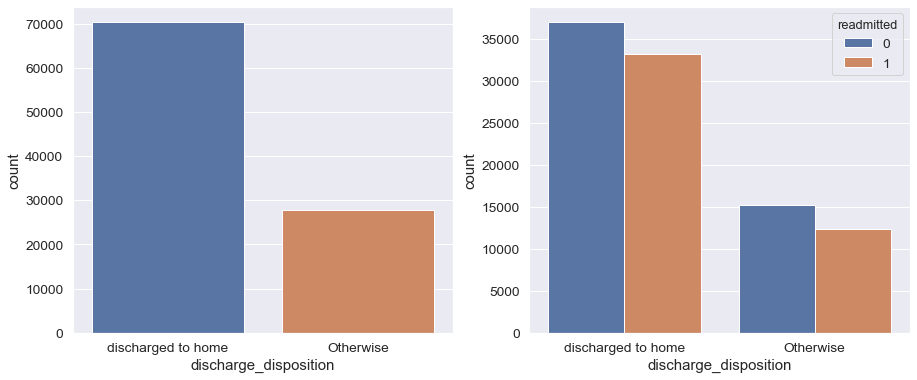

In [153]:
f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(data.discharge_disposition,ax=axes[0])
sns.countplot(data.discharge_disposition,hue = data['readmitted'], ax=axes[1])
plt.show()

Inferences:
*   approx..72% of patients discharged to home .
*   approx.. 73% of patients who dischaged to home are readmitted.

**HbA1c**

**values for A1C test result and change**:

The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months. The A1C test can be used to diagnose type 2 diabetes and prediabetes.1 The A1C test is also the primary test used for diabetes management.

In [154]:
data['HbA1c'] = data['A1Cresult'].replace({'None':'No test was performed','Norm':'Normal result of the test'})

v = 'Result was high and the diabetic medication was changed'
a = ((data['A1Cresult'] == '>8') | (data['A1Cresult'] == '>7')) & (data['change']=='Ch')
data.loc[a,'HbA1c'] = data.loc[a, 'HbA1c'].replace({'>7':v,'>8':v})

v = 'Result was high but the diabetic medication was not changed'
a = ((data['A1Cresult'] == '>8') | (data['A1Cresult'] == '>7')) & (data['change']=='No')
data.loc[a,'HbA1c'] = data.loc[a, 'HbA1c'].replace({'>7':v,'>8':v})

data['HbA1c'].value_counts()

No test was performed                                          81859
Result was high and the diabetic medication was changed         6937
Normal result of the test                                       4854
Result was high but the diabetic medication was not changed     4402
Name: HbA1c, dtype: int64

### Converting Categorical data to Numerical Data using Label encoder

In [155]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

cols = ['race', 'diag_1', 'diag_2', 'diag_3',"HbA1c","gender","max_glu_serum","discharge_disposition","admission_source",
        "admission_type","readmitted","diabetesMed"]

for col in cols:
    data[col] = labelencoder.fit_transform(data[col])

In [156]:
# dropping columns related to IDs
data.drop(['encounter_id','patient_nbr','A1Cresult','change'],axis=1,inplace=True)

##### Building model without feature engineering and feature selection..

In [157]:
from sklearn.model_selection import train_test_split
X=data.drop(["readmitted"],axis=1)
y=data["readmitted"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
print('Training score =', model.score(x_train, y_train))
print('Test score =', model.score(x_test, y_test))

Training score = 0.615580744798648
Test score = 0.6151074245308675


# Assumptions for logistic regression

1. Dependent binary variable

In [158]:
data['readmitted'].value_counts()

0    52337
1    45715
Name: readmitted, dtype: int64

The dataset has only two values in its dependent variable

2. No repeated observations

In [159]:
data.duplicated().value_counts()

False    98048
True         4
dtype: int64

No repeated observations or very less.

3. No multi-collinearity

In [160]:
# Taking the dependent and independent variables separately and splitting them into train and test dataset

X = data.drop('readmitted', axis=1)
y= data['readmitted']

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

All the variables present have a VIF value close to 1, so multi col-linearity is not present.

4. Large sample size

In [161]:
data.shape

(98052, 44)

# Feature Selection

Now that we have explored the trends and relationships within the data, we can work on selecting a set of features for our models. In particular, we learned the following from EDA which can help us in engineering/selecting features:     

1. The target variable is highly imbalanced.     
2. The number of patients getting prescribed with diabetes medication in the hospitals is more than the ones not getting prescribed with the same.     
3. Approximately 78% of total males gets prescribed with diabetes medication and 76% in case of females.     
4. Approximately 77% of total Caucasians and AfricanAmeriacans gets prescribed with diabetes medication.     
5. The number of prescribed medication of diabetes under Diabetes are highest, which is 84%.     
6. Around 69% of the pateints above 60 years are readmitting.     
7. Maximum patients arriving on all categories of time are prescribed with diabetes medication.     
8. Most of the patients admitted from emergency rooms are presribed with diabetes medication.     
9. Patients who had a high result of A1C test had a higher percentage of them getting prescribed with diabetes medication.
10. The percentage of patients getting prescribed with diabetes medication are more for patients getting readmitted than those not seeking readmission.     
11. Most of the patients under emergency, urgent and elective types have been prescribed with diabetes medication.     

Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.
Feature selection is an iterative process that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

Feature selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn.

For feature selection, we will do the following:     
     
1. Remove columns related to ids.
2. Perform a Chi-square test of independence to select only significant features based on their p-values.

In [162]:
num = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','number_diagnoses']
columns = []
p = []
for col in num: 

    import scipy.stats as stats
    statistic,p_value = stats.f_oneway(data[data['readmitted']==0][col], data[data['readmitted']==1][col])
    columns.append(col)
    p.append(p_value)
    
d1 = pd.DataFrame({'Feature':columns,'p_value':p})
d1

,Feature,p_value
0,time_in_hospital,1.189234e-52
1,num_lab_procedures,6.491250e-32
2,num_procedures,2.096888e-50
3,num_medications,7.000451e-81
4,number_outpatient,NaN
5,number_emergency,NaN
6,number_inpatient,0.000000e+00
7,number_diagnoses,1.147244e-235


In [163]:
# Applying Chi2 test to find out the p_values

columns = []
p_value = []
for col in ['race', 'gender','diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed',
       'age_cat', 'discharge_disposition', 'admission_source',
       'admission_type', 'HbA1c','readmitted']:
    a = stats.chi2_contingency(pd.crosstab(data['readmitted'], data[col]))
    columns.append(col)
    p_value.append(a[1])
    
d2 = pd.DataFrame({'Feature':columns,'p_value':p_value})
d2

,Feature,p_value
0,race,1.056647e-17
1,gender,3.588814e-08
2,diag_1,1.827633e-60
3,diag_2,4.063193e-32
4,diag_3,5.913864e-27
5,max_glu_serum,2.506782e-10
6,metformin,2.666290e-17
7,repaglinide,1.845921e-10
8,nateglinide,5.837905e-01
9,chlorpropamide,2.180909e-01


In [164]:
c  = pd.concat([d1,d2])

In [165]:
# Selecting significant features from the list (having p-value<0.05s13)
new_features = list(c[c['p_value']<0.05]['Feature'])
new_df = data.loc[:,new_features]
print(len(new_features))
new_features

26


['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_inpatient',
 'number_diagnoses',
 'race',
 'gender',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'metformin',
 'repaglinide',
 'glipizide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'insulin',
 'diabetesMed',
 'age_cat',
 'discharge_disposition',
 'admission_source',
 'admission_type',
 'HbA1c',
 'readmitted']

Our final dataset now has 28 features (one of the columns is the target)

In [166]:
print(list(new_features))

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'metformin', 'repaglinide', 'glipizide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'diabetesMed', 'age_cat', 'discharge_disposition', 'admission_source', 'admission_type', 'HbA1c', 'readmitted']


In [167]:
new_df.shape

(98052, 26)

## Scaling Features

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

There are two ways to scale features:

1. For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.
2. For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.

In [168]:
# Taking the dependent and independent variables separately and splitting them into train and test dataset

X = new_df.drop('readmitted',axis=1)
y= new_df['readmitted']

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [190]:
from sklearn.preprocessing  import MinMaxScaler
mm=MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

### Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1. Logistic Regression
2. Naive-Bayes
3. K-Nearest Neighbors Classifier
4. Decision Tree Classifier
5. Random Forest Classifier

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning.

In [191]:
train = []
test = []
def model_fit(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_train_pred=algo.predict(X_train)
  y_train_prob=algo.predict_proba(X_train)[:,1]
  print("auc score of train data",roc_auc_score(y_train,y_train_prob))
  train.append(roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test) #ML
  y_test_prob=algo.predict_proba(X_test)[:,1] #  in statistics
  print("auc score of test data",roc_auc_score(y_test,y_test_prob))
  test.append(roc_auc_score(y_test,y_test_prob))
  print("confusion_matrix",confusion_matrix(y_test,y_test_pred))
  print("classification_report")
  print(classification_report(y_test,y_test_pred))
  fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC_AUC CURVE")

auc score of train data 0.6513196973678956
auc score of test data 0.6455951877492192
confusion_matrix [[11838  3867]
 [ 7542  6169]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.75      0.67     15705
           1       0.61      0.45      0.52     13711

    accuracy                           0.61     29416
   macro avg       0.61      0.60      0.60     29416
weighted avg       0.61      0.61      0.60     29416



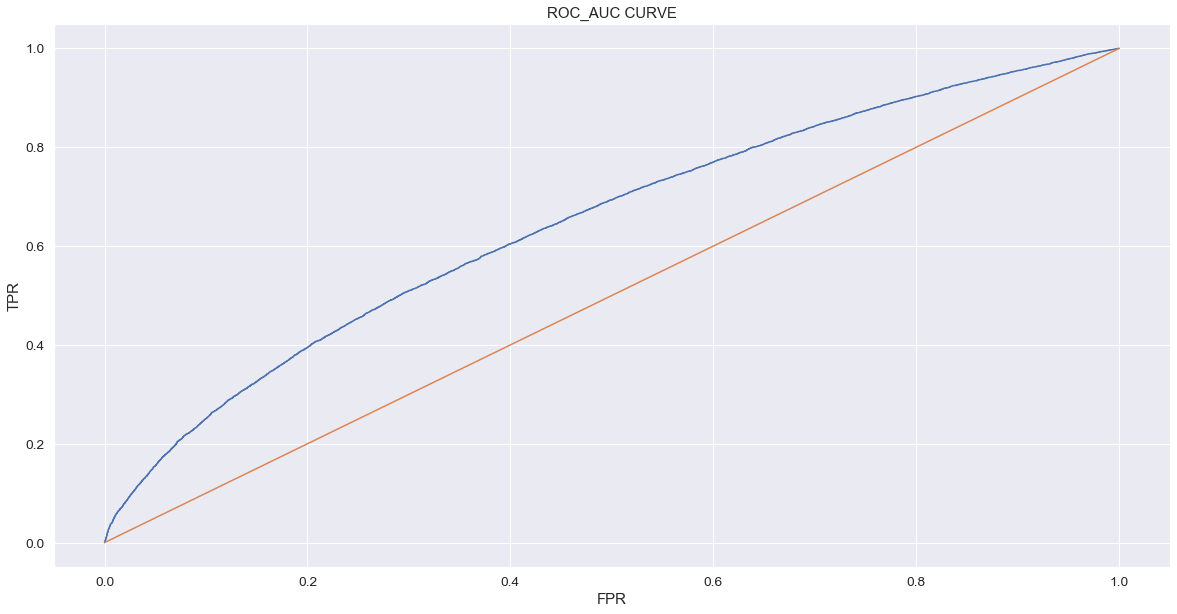

In [192]:
### **LOGISTIC REGRESSION**

lr=LogisticRegression(solver="liblinear")
model_fit(lr,X_train,y_train,X_test,y_test)

auc score of train data 0.6405354890497554
auc score of test data 0.6341869089092524
confusion_matrix [[13120  2585]
 [ 9275  4436]]
classification_report
              precision    recall  f1-score   support

           0       0.59      0.84      0.69     15705
           1       0.63      0.32      0.43     13711

    accuracy                           0.60     29416
   macro avg       0.61      0.58      0.56     29416
weighted avg       0.61      0.60      0.57     29416



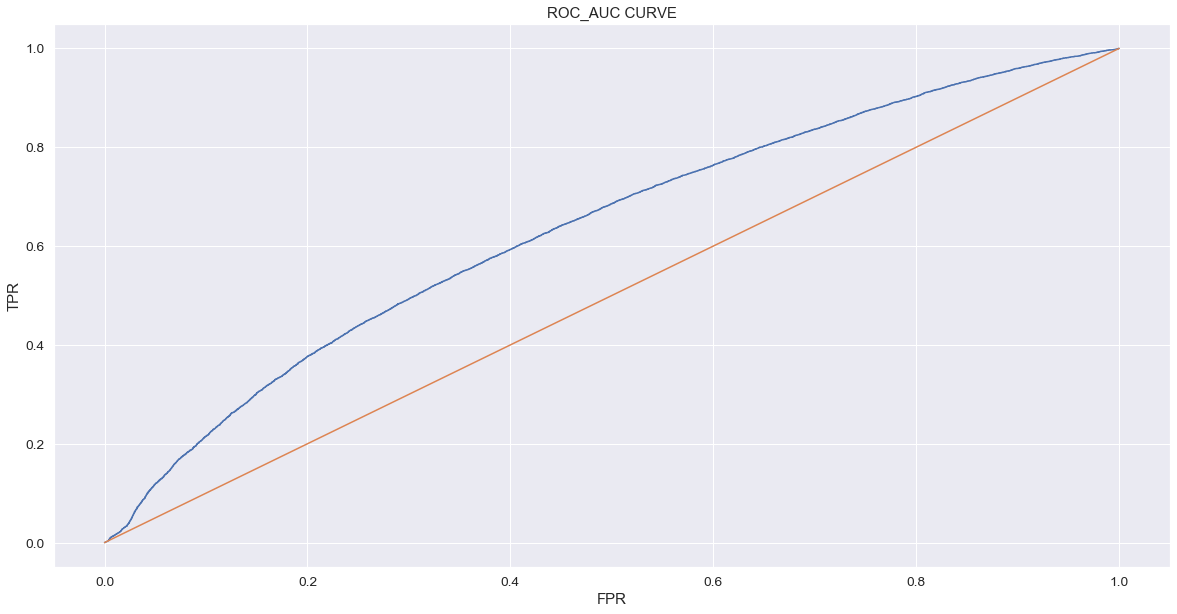

In [173]:
NB = GaussianNB()
model_fit(NB,X_train,y_train,X_test,y_test)

auc score of train data 0.9999999995735137
auc score of test data 0.5439933766233795
confusion_matrix [[9023 6682]
 [6671 7040]]
classification_report
              precision    recall  f1-score   support

           0       0.57      0.57      0.57     15705
           1       0.51      0.51      0.51     13711

    accuracy                           0.55     29416
   macro avg       0.54      0.54      0.54     29416
weighted avg       0.55      0.55      0.55     29416



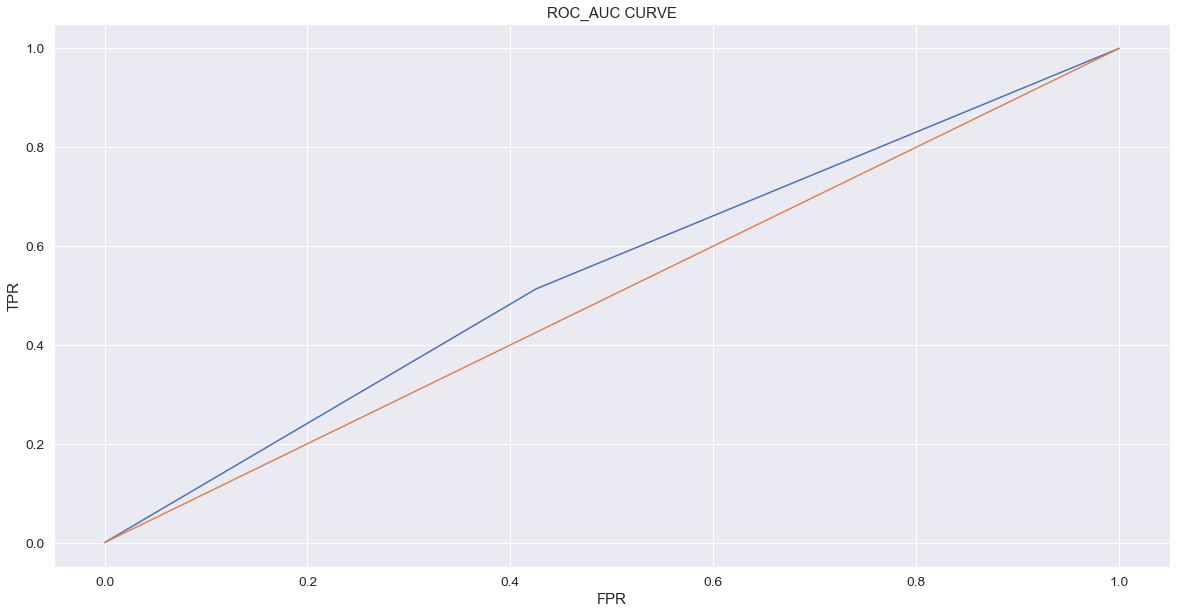

In [174]:
DT = DecisionTreeClassifier()
model_fit(DT,X_train,y_train,X_test,y_test)

In [175]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'max_depth': range(1, 15),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}
GS_dt = GridSearchCV(DT, parameters, 
                    cv=3, scoring="accuracy")
GS_dt.fit(X_train,y_train)

GS_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

auc score of train data 0.6644561841970834
auc score of test data 0.6470540191668879
confusion_matrix [[11596  4109]
 [ 7301  6410]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.74      0.67     15705
           1       0.61      0.47      0.53     13711

    accuracy                           0.61     29416
   macro avg       0.61      0.60      0.60     29416
weighted avg       0.61      0.61      0.60     29416



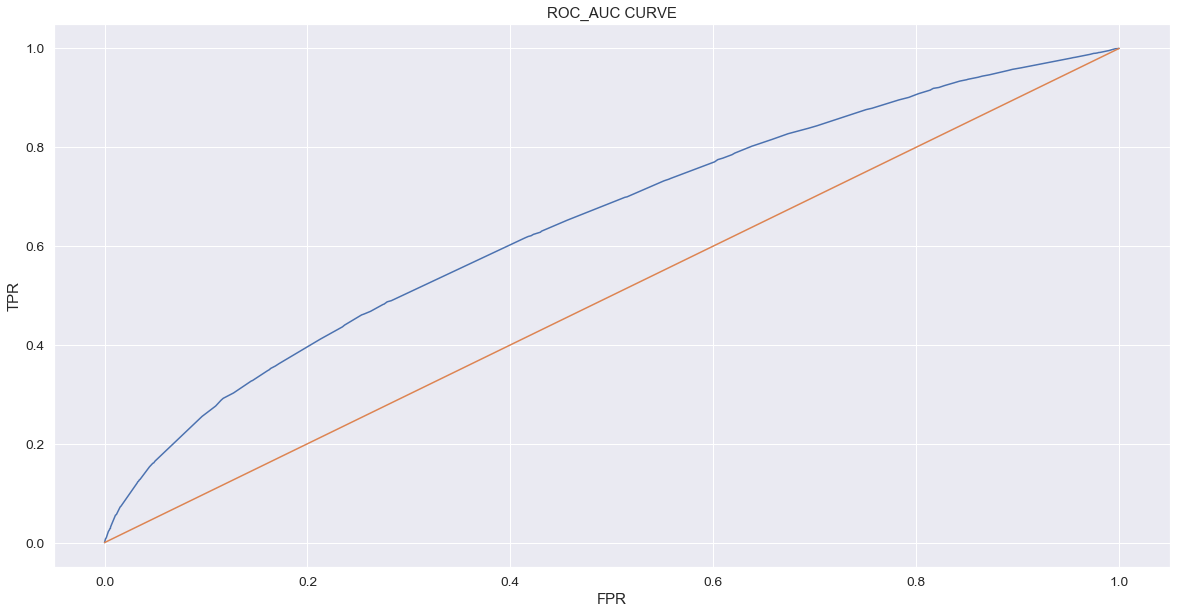

In [176]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=50,min_samples_split=50)
model_fit(DT,X_train,y_train,X_test,y_test)

auc score of train data 0.9999999995735136
auc score of test data 0.6505079696860542
confusion_matrix [[11175  4530]
 [ 6861  6850]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.71      0.66     15705
           1       0.60      0.50      0.55     13711

    accuracy                           0.61     29416
   macro avg       0.61      0.61      0.60     29416
weighted avg       0.61      0.61      0.61     29416



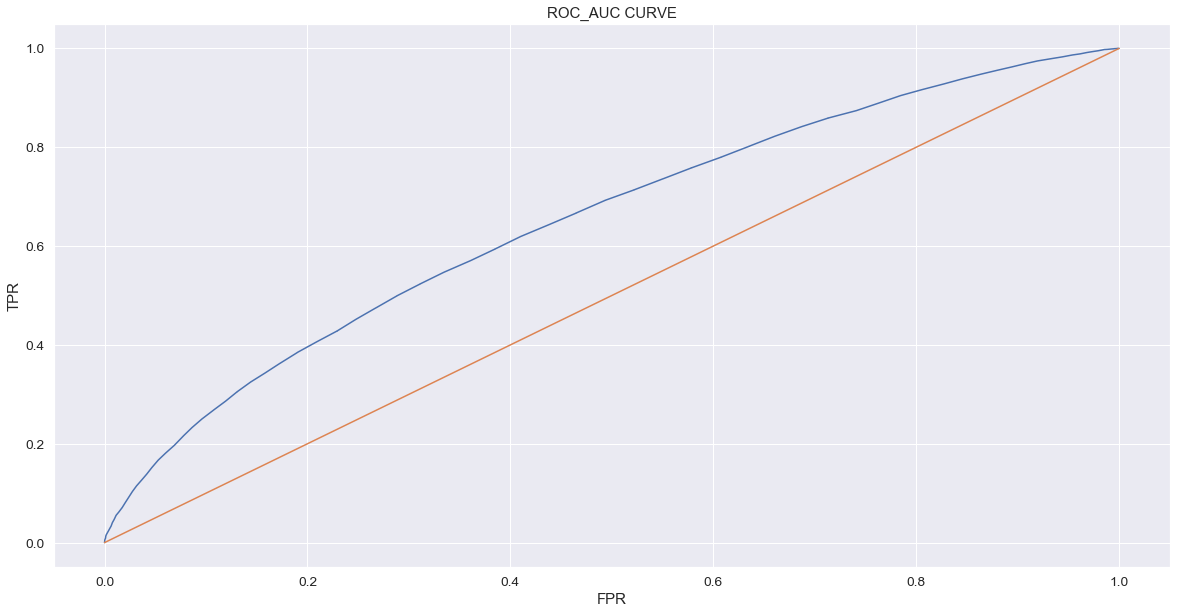

In [177]:
RF = RandomForestClassifier()
model_fit(RF,X_train,y_train,X_test,y_test)

In [178]:
param_grid={'max_depth':[2,4,6,8,10],'min_samples_leaf':range(1,50,5),
            'min_samples_split':range(10,100,50),'n_estimators':[1,2,3,4,5,6]}
rs= RandomizedSearchCV(RF, param_distributions=param_grid, cv=3)
rs.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [179]:
rs.best_params_

{'n_estimators': 6,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_depth': 6}

auc score of train data 0.6621051659531312
auc score of test data 0.6491550216432816
confusion_matrix [[12221  3484]
 [ 7957  5754]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.78      0.68     15705
           1       0.62      0.42      0.50     13711

    accuracy                           0.61     29416
   macro avg       0.61      0.60      0.59     29416
weighted avg       0.61      0.61      0.60     29416



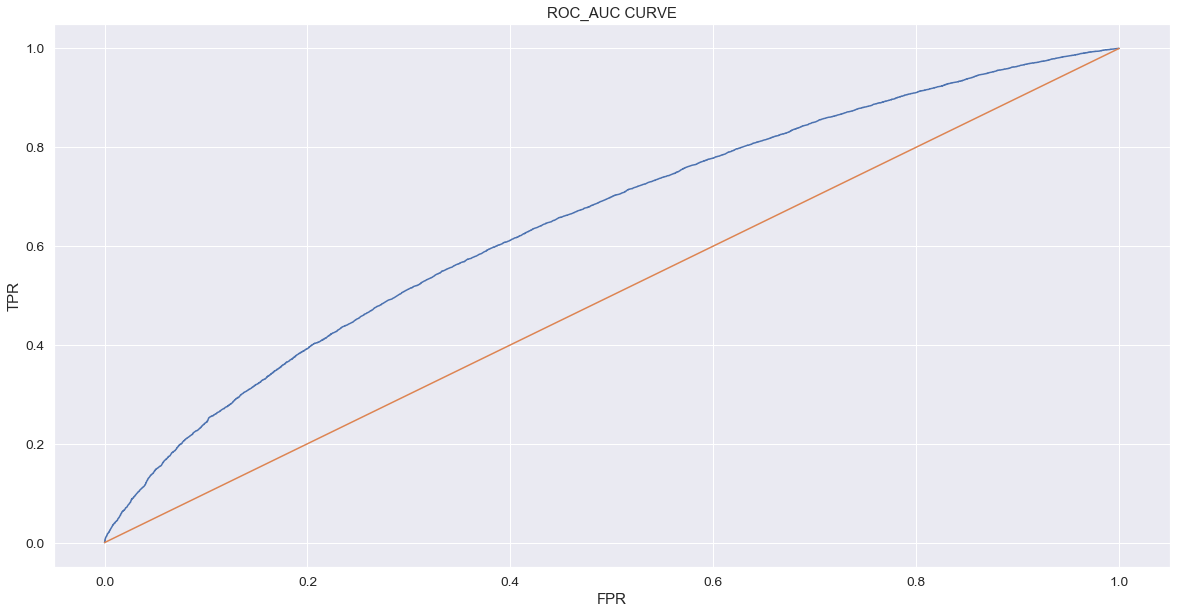

In [180]:
RF = RandomForestClassifier(**rs.best_params_,random_state=0)
model_fit(RF,X_train,y_train,X_test,y_test)

In [181]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,cohen_kappa_score


auc score of train data 0.647063470449165
auc score of test data 0.641649871032424
confusion_matrix [[12396  3309]
 [ 8165  5546]]
classification_report
              precision    recall  f1-score   support

           0       0.60      0.79      0.68     15705
           1       0.63      0.40      0.49     13711

    accuracy                           0.61     29416
   macro avg       0.61      0.60      0.59     29416
weighted avg       0.61      0.61      0.59     29416



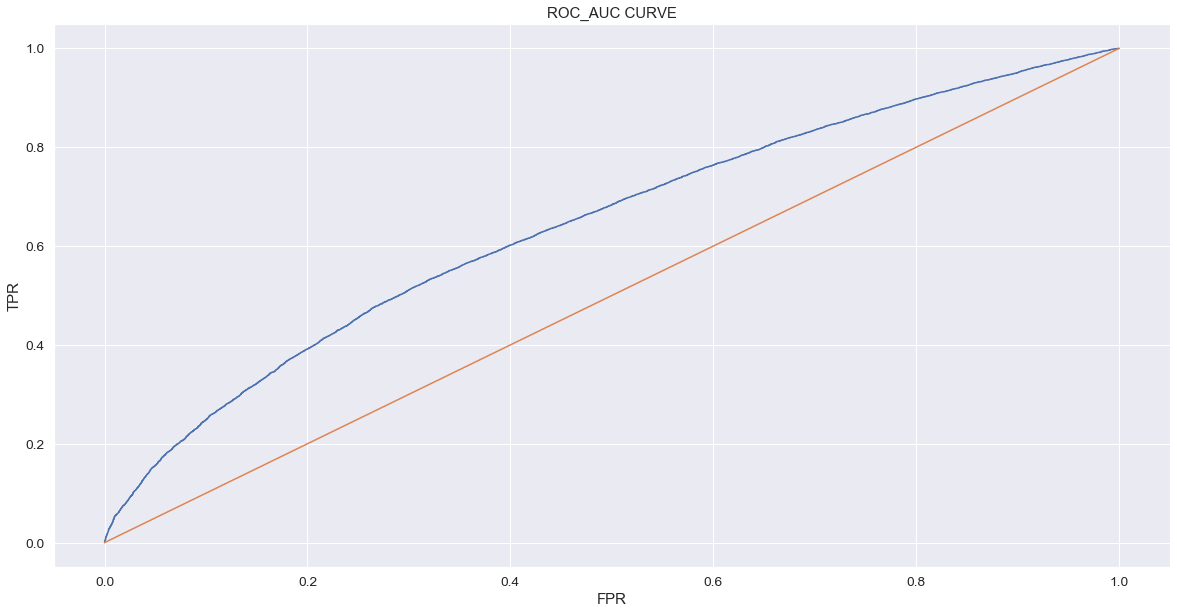

In [182]:
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
df=AdaBoostClassifier(lr,n_estimators=50,random_state=1)
df.fit(X_train,y_train)
model_fit(df,X_train,y_train,X_test,y_test)


auc score of train data 0.776138591228728
auc score of test data 0.6618503291591368
confusion_matrix [[11074  4631]
 [ 6504  7207]]
classification_report
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     15705
           1       0.61      0.53      0.56     13711

    accuracy                           0.62     29416
   macro avg       0.62      0.62      0.61     29416
weighted avg       0.62      0.62      0.62     29416



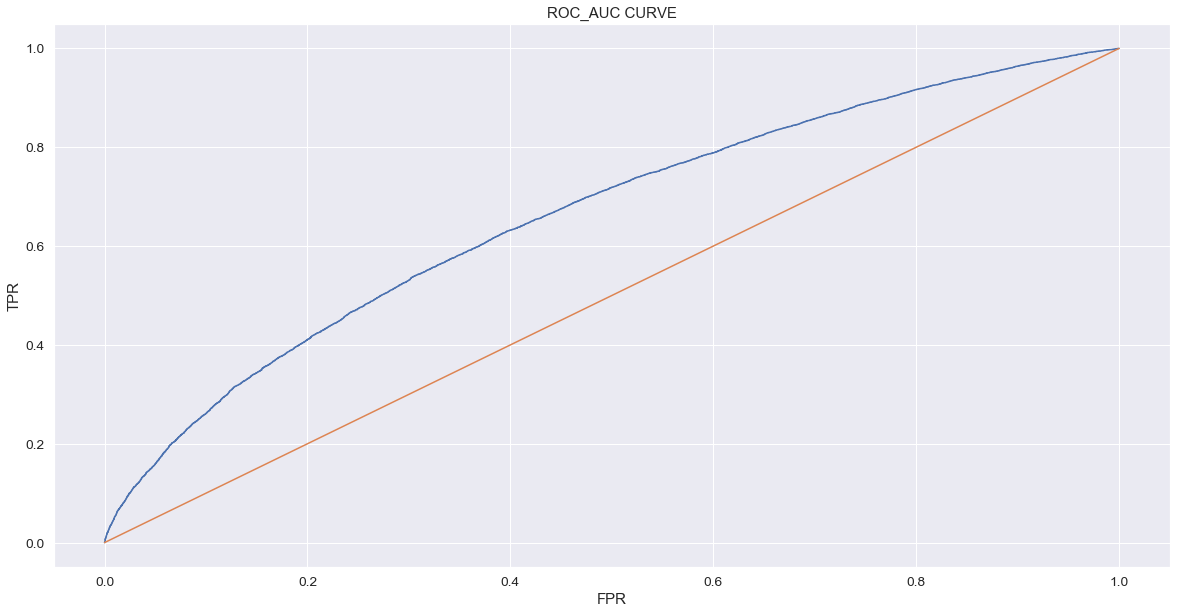

In [183]:
df=AdaBoostClassifier(RF,n_estimators=50,random_state=1)
df.fit(X_train,y_train)
model_fit(df,X_train,y_train,X_test,y_test)

auc score of train data 0.5342425713895121
auc score of test data 0.5278296966225363
confusion_matrix [[ 2205 13500]
 [ 2169 11542]]
classification_report
              precision    recall  f1-score   support

           0       0.50      0.14      0.22     15705
           1       0.46      0.84      0.60     13711

    accuracy                           0.47     29416
   macro avg       0.48      0.49      0.41     29416
weighted avg       0.48      0.47      0.39     29416



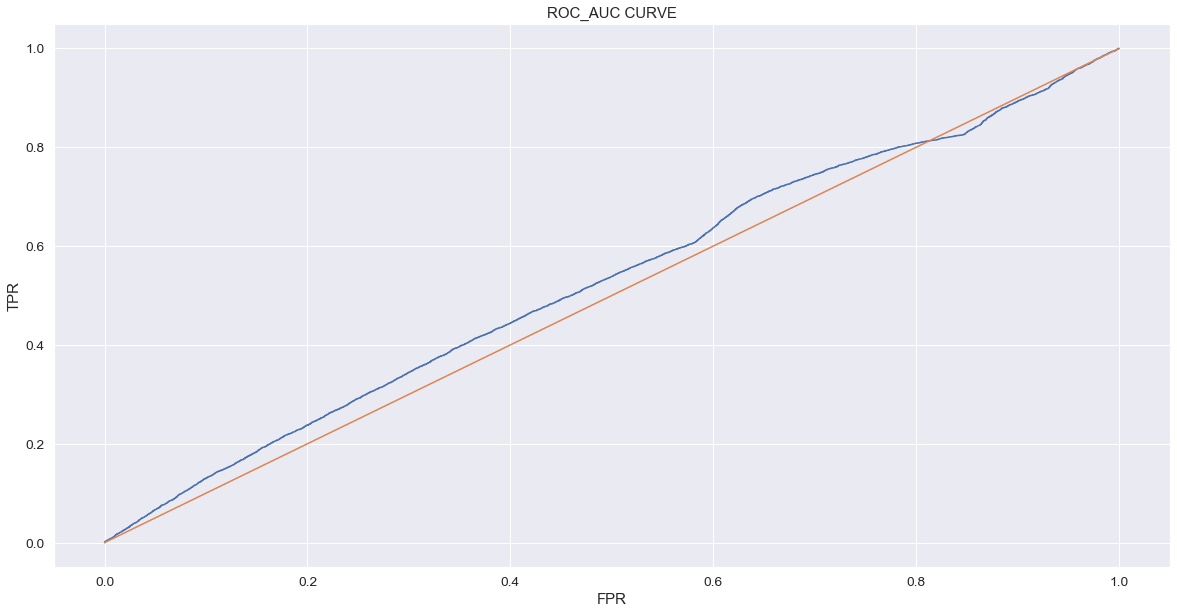

In [184]:
df=AdaBoostClassifier(NB,n_estimators=50,random_state=1)
df.fit(X_train,y_train)
model_fit(df,X_train,y_train,X_test,y_test)

auc score of train data 0.6617656056430652
auc score of test data 0.6556989091063441
confusion_matrix [[11953  3752]
 [ 7545  6166]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.76      0.68     15705
           1       0.62      0.45      0.52     13711

    accuracy                           0.62     29416
   macro avg       0.62      0.61      0.60     29416
weighted avg       0.62      0.62      0.61     29416



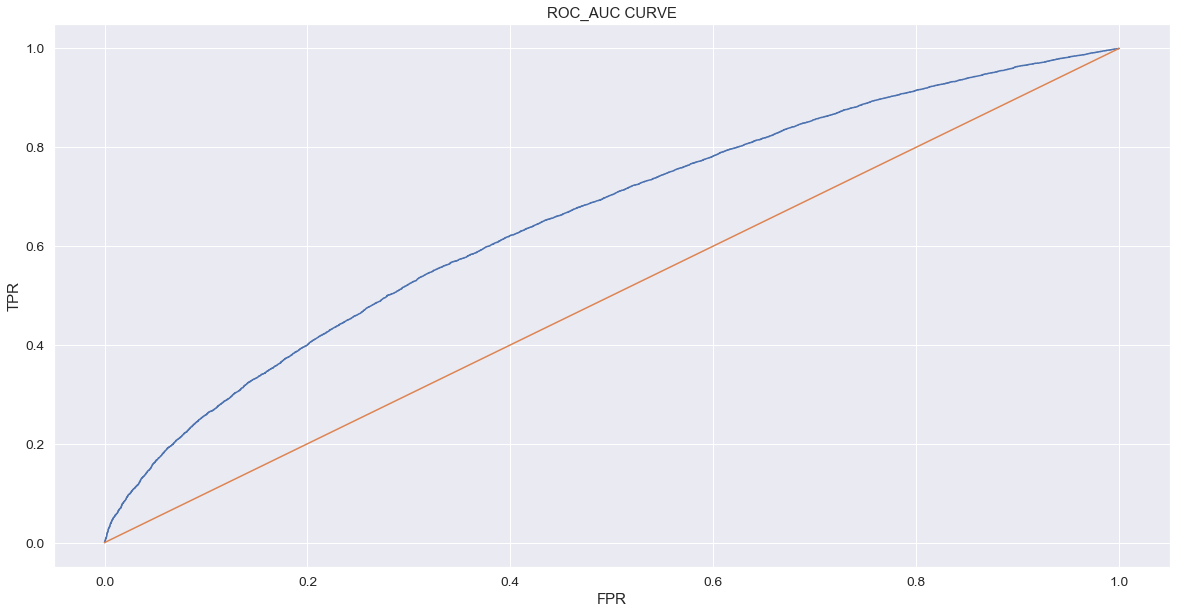

In [185]:
df=AdaBoostClassifier(n_estimators=50,random_state=1)
df.fit(X_train,y_train)
model_fit(df,X_train,y_train,X_test,y_test)

In [186]:
score = pd.DataFrame({'model':['Logistic Regression','GaussianNB','Decision Tree','Decision Tree(tunned)',
                              'Random Forest','Random Forest(tunned)','AdaBoost(Logistic)','AdaBoost(Random Forest)',
                              'AdaBoost(GaussianNB)','AdaBoostClassifier'],
                     'train_accuracy':train,'test_accracy':test})
score

,model,train_accuracy,test_accracy
0,Logistic Regression,0.651320,0.645595
1,GaussianNB,0.640535,0.634187
2,Decision Tree,1.000000,0.543993
3,Decision Tree(tunned),0.664456,0.647054
4,Random Forest,1.000000,0.650508
5,Random Forest(tunned),0.662105,0.649155
6,AdaBoost(Logistic),0.647063,0.641650
7,AdaBoost(Random Forest),0.776139,0.661850
8,AdaBoost(GaussianNB),0.534243,0.527830
9,AdaBoostClassifier,0.661766,0.655699


In [187]:
from sklearn.ensemble import BaggingClassifier
bagreg = BaggingClassifier(lr, n_estimators=50, bootstrap=True, oob_score=True, random_state=1)

In [188]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

auc score of train data 0.651337226808895
auc score of test data 0.6456687209666799
confusion_matrix [[11842  3863]
 [ 7544  6167]]
classification_report
              precision    recall  f1-score   support

           0       0.61      0.75      0.67     15705
           1       0.61      0.45      0.52     13711

    accuracy                           0.61     29416
   macro avg       0.61      0.60      0.60     29416
weighted avg       0.61      0.61      0.60     29416



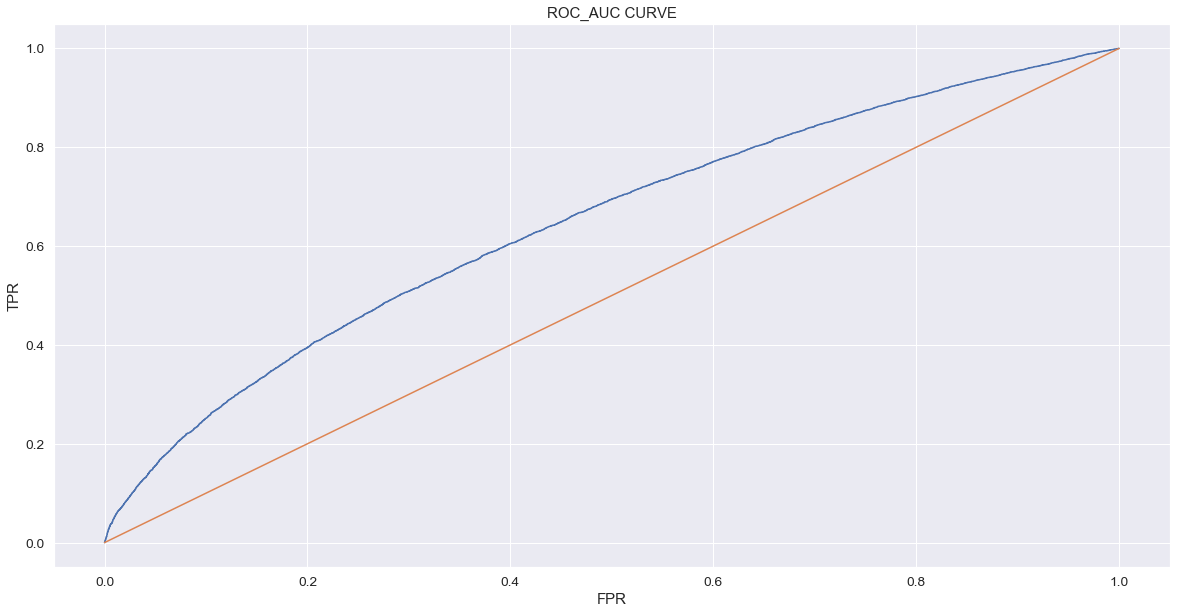

In [189]:
model_fit(bagreg,X_train,y_train,X_test,y_test)